In [200]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 📊 Phân tích độ phân tán dữ liệu với Tứ phân vị & Percentiles

---

## 🎯 Mục đích sử dụng

### **Dùng để phân tích độ phân tán của dữ liệu**
- Hiểu được sự **phân bố** của dữ liệu
- Xác định **vị trí tương đối** của các giá trị
- Phát hiện **giá trị ngoại lai** (outliers)
- So sánh **độ biến thiên** giữa các tập dữ liệu

---

## 🔍 Khái niệm về Giá trị ngoại lai (Outliers)

> **📌 Định nghĩa:** Giá trị ngoại lai là các giá trị **lớn hơn hoặc nhỏ hơn bất thường** so với các dữ liệu khác trong tập dữ liệu.

### **🚨 Cách xác định Outliers bằng Tứ phân vị:**

```
Outliers thấp: < Q1 - 1.5 × IQR
Outliers cao:  > Q3 + 1.5 × IQR
```

**Trong đó:** `IQR = Q3 - Q1` (Khoảng tứ phân vị)

---

## 📏 Hệ thống phân chia dữ liệu

> **⚠️ Yêu cầu quan trọng:** Các dữ liệu **phải được sắp xếp tăng dần** trước khi tính toán.

| Loại phân vị | Tên tiếng Anh | Chia thành | Mỗi phần chứa | Ký hiệu |
|--------------|---------------|------------|---------------|---------|
| **Bách phân vị** | Percentile | 100 phần | 1% dữ liệu | P1, P2, ..., P99 |
| **Thập phân vị** | Deciles | 10 phần | 10% dữ liệu | D1, D2, ..., D9 |
| **Tứ phân vị** | Quartiles | 4 phần | 25% dữ liệu | Q1, Q2, Q3 |

---

## 🧮 Cách tính các loại phân vị

### **📐 Công thức chung:**
```
Vị trí của Pk = k × (n+1) / 100    (Percentile)
Vị trí của Dk = k × (n+1) / 10     (Decile)
Vị trí của Qk = k × (n+1) / 4      (Quartile)
```

---

## 💡 Ví dụ thực tế: Phân tích điểm thi

**📋 Dữ liệu điểm thi của 20 học sinh:**
```
45, 52, 58, 61, 65, 68, 70, 72, 75, 78, 80, 82, 85, 87, 90, 92, 94, 96, 98, 100
```

### **🔢 Tính các Tứ phân vị:**

**Q1** (25%): Vị trí = 1×(20+1)/4 = 5.25
```
Q1 = 65 + 0.25×(68-65) = 65.75
```

**Q2** (50% - Trung vị): Vị trí = 2×(20+1)/4 = 10.5
```
Q2 = (78+80)/2 = 79
```

**Q3** (75%): Vị trí = 3×(20+1)/4 = 15.75
```
Q3 = 90 + 0.75×(92-90) = 91.5
```

### **📊 Phân tích kết quả:**

| Tứ phân vị | Giá trị | Ý nghĩa |
|------------|---------|---------|
| **Q1** | 65.75 | 25% học sinh có điểm ≤ 65.75 |
| **Q2** | 79 | 50% học sinh có điểm ≤ 79 (điểm trung vị) |
| **Q3** | 91.5 | 75% học sinh có điểm ≤ 91.5 |

### **🎯 Phân tích độ phân tán:**

```
IQR = Q3 - Q1 = 91.5 - 65.75 = 25.75
```

**Ranh giới Outliers:**
- **Outliers thấp**: < 65.75 - 1.5×25.75 = 27.125
- **Outliers cao**: > 91.5 + 1.5×25.75 = 130.125

**Kết luận:** Không có outliers trong dữ liệu này (tất cả điểm đều nằm trong khoảng 27.125 - 130.125).

---

## 📈 Ví dụ về Deciles và Percentiles

### **Thập phân vị (D5):**
```
D5 = P50 = Q2 = 79 (Trung vị)
```

### **Bách phân vị quan trọng:**
- **P25** = Q1 = 65.75
- **P50** = Q2 = 79  
- **P75** = Q3 = 91.5
- **P90**: Vị trí = 90×(20+1)/100 = 18.9
  ```
  P90 = 96 + 0.9×(98-96) = 97.8
  ```

---

## 🎨 Trực quan hóa với Box Plot

```
    |     ┌─────┬─────┐     |
    |     │     │     │     |
────┼─────┼─────┼─────┼─────┼────
   45    Q1    Q2    Q3    100
        65.75  79   91.5

Min │←── IQR ──→│ Max
    │  25.75   │
```

---

## 🔧 Code Python tính toán

```python
import numpy as np

def calculate_quartiles(data):
    """Tính tứ phân vị cho dữ liệu"""
    data_sorted = np.sort(data)
    
    Q1 = np.percentile(data_sorted, 25)
    Q2 = np.percentile(data_sorted, 50)  # Median
    Q3 = np.percentile(data_sorted, 75)
    
    IQR = Q3 - Q1
    
    # Xác định outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = data_sorted[(data_sorted < lower_bound) | 
                          (data_sorted > upper_bound)]
    
    return {
        'Q1': Q1, 'Q2': Q2, 'Q3': Q3,
        'IQR': IQR,
        'Outliers': outliers,
        'Bounds': (lower_bound, upper_bound)
    }

# Ví dụ sử dụng
scores = [45, 52, 58, 61, 65, 68, 70, 72, 75, 78, 
          80, 82, 85, 87, 90, 92, 94, 96, 98, 100]
result = calculate_quartiles(scores)
print(f"Q1: {result['Q1']}")
print(f"Q2: {result['Q2']}")
print(f"Q3: {result['Q3']}")
print(f"IQR: {result['IQR']}")
```

---

## 📚 Ứng dụng thực tế

### **🏥 Y tế:**
- Phân tích **chỉ số BMI** của dân số
- Đánh giá **huyết áp** bình thường/bất thường

### **💰 Kinh tế:**
- Phân tích **phân bố thu nhập** 
- Xác định **ngưỡng nghèo** (thường là D1 hoặc P10)

### **🎓 Giáo dục:**
- **Xếp hạng học sinh** theo thành tích
- Phân tích **độ khó của đề thi**

### **📊 Kinh doanh:**
- Phân tích **hiệu suất bán hàng**
- Đánh giá **mức độ hài lòng khách hàng**

---

## ⚡ Tóm tắt quan trọng

> **🎯 Ghi nhớ:**
> - **Percentiles** (P): Chia 100 phần - chi tiết nhất
> - **Deciles** (D): Chia 10 phần - cân bằng
> - **Quartiles** (Q): Chia 4 phần - phổ biến nhất
> - **IQR** = Q3 - Q1: Đo độ phân tán của 50% dữ liệu ở giữa
> - **Outliers**: Giá trị nằm ngoài khoảng [Q1-1.5×IQR, Q3+1.5×IQR]

# 📦 `plt.boxplot()` trong Matplotlib

`plt.boxplot()` là hàm dùng để vẽ biểu đồ hộp (box plot) trong thư viện Matplotlib — một công cụ rất mạnh để trực quan hóa phân bố dữ liệu, xác định trung vị, độ phân tán và phát hiện các điểm ngoại lai (outliers).

---

## ✅ Cú pháp đầy đủ:

```python
plt.boxplot(x, notch=False, vert=True, patch_artist=False,
            widths=0.5, meanline=False, showmeans=False,
            showcaps=True, showbox=True, whiskerprops=None,
            boxprops=None, capprops=None, flierprops=None,
            medianprops=None, meanprops=None, manage_ticks=True,
            labels=None)
plt.boxplot(
    data,
    notch=True,                  # Hiển thị khía ở median
    vert=True,                   # Vẽ theo chiều dọc
    patch_artist=True,           # Cho phép tô màu hộp
    widths=0.3,                  # Độ rộng hộp
    showmeans=True,              # Hiển thị giá trị trung bình
    meanline=True,               # Dùng đường cho trung bình thay vì chấm
    labels=["Nhóm A", "Nhóm B", "Nhóm C"],  # Tên các nhóm
    boxprops=dict(facecolor='lightblue', color='blue'),
    medianprops=dict(color='red'),
    meanprops=dict(color='green', linestyle='--'),
    flierprops=dict(marker='o', color='gray', markersize=5)
)


## 🧩 Giải thích các tham số chính của `plt.boxplot()`

| Tham số         | Giải thích |
|------------------|------------|
| `x`              | Dữ liệu đầu vào. Có thể là danh sách, NumPy array hoặc danh sách của nhiều danh sách (để vẽ nhiều nhóm dữ liệu). |
| `notch`          | Nếu đặt `True`, hộp sẽ có khía ở median để giúp so sánh trung vị giữa các nhóm. |
| `vert`           | Nếu `True`, biểu đồ được vẽ theo chiều dọc. Nếu `False`, vẽ theo chiều ngang. |
| `patch_artist`   | Cho phép tô màu phần hộp nếu đặt `True`, thường dùng với `boxprops`. |
| `widths`         | Độ rộng của mỗi hộp. Có thể là một số hoặc một danh sách tương ứng với từng nhóm. |
| `labels`         | Danh sách tên cho từng nhóm dữ liệu (hiển thị ở trục X). |
| `showmeans`      | Nếu `True`, hiển thị điểm hoặc đường trung bình (mean) trên mỗi hộp. |
| `meanline`       | Nếu `True`, vẽ đường trung bình thay vì dấu chấm. Áp dụng khi `showmeans=True`. |
| `showcaps`       | Hiển thị hoặc ẩn các đầu mút của "whiskers". |
| `showbox`        | Hiển thị hoặc ẩn phần hộp (box). |
| `whiskerprops`   | Dictionary tuỳ chỉnh kiểu dáng của whiskers (vạch mở rộng từ hộp). |
| `boxprops`       | Dictionary tuỳ chỉnh kiểu dáng của hộp (màu nền, màu viền, kiểu nét…). |
| `capprops`       | Dictionary tuỳ chỉnh phần đầu mút (caps) của whiskers. |
| `flierprops`     | Dictionary tuỳ chỉnh các điểm ngoại lai (outliers), bao gồm hình dạng, màu, kích thước,… |
| `medianprops`    | Dictionary tuỳ chỉnh đường trung vị (median). |
| `meanprops`      | Dictionary tuỳ chỉnh điểm hoặc đường trung bình (mean), áp dụng khi `showmeans=True`. |



In [202]:
def calculate_quartiles(data):
    """Tính tứ phân vị cho dữ liệu"""
    data_sorted = np.sort(data)
    
    Q1 = np.percentile(data_sorted, 25)
    Q2 = np.percentile(data_sorted, 50)  # Median
    Q3 = np.percentile(data_sorted, 75)
    
    IQR = Q3 - Q1
    
    # Xác định outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = data_sorted[(data_sorted < lower_bound) | 
                          (data_sorted > upper_bound)]
    
    return {
        'Q1': Q1, 'Q2': Q2, 'Q3': Q3,
        'IQR': IQR,
        'Outliers': outliers,
        'Bounds': (lower_bound, upper_bound)
    }

# Ví dụ sử dụng
scores = [45, 52, 58, 61, 65, 68, 70, 72, 75, 78, 
          80, 82, 85, 87, 90, 92, 94, 96, 98, 100]
result = calculate_quartiles(scores)
print(f"Q1: {result['Q1']}")
print(f"Q2: {result['Q2']}")
print(f"Q3: {result['Q3']}")
print(f"IQR: {result['IQR']}")

Q1: 67.25
Q2: 79.0
Q3: 90.5
IQR: 23.25


In [203]:
df = sns.load_dataset('tips')
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [204]:

data = df[['total_bill','tip']]
data_2 = [df['total_bill'], df['tip']]
print(data)
print(data_2)

     total_bill   tip
0         16.99  1.01
1         10.34  1.66
2         21.01  3.50
3         23.68  3.31
4         24.59  3.61
..          ...   ...
239       29.03  5.92
240       27.18  2.00
241       22.67  2.00
242       17.82  1.75
243       18.78  3.00

[244 rows x 2 columns]
[0      16.99
1      10.34
2      21.01
3      23.68
4      24.59
       ...  
239    29.03
240    27.18
241    22.67
242    17.82
243    18.78
Name: total_bill, Length: 244, dtype: float64, 0      1.01
1      1.66
2      3.50
3      3.31
4      3.61
       ... 
239    5.92
240    2.00
241    2.00
242    1.75
243    3.00
Name: tip, Length: 244, dtype: float64]


C:\Users\hungd\AppData\Local\Temp\ipykernel_6204\381850053.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(
C:\Users\hungd\AppData\Local\Temp\ipykernel_6204\381850053.py:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


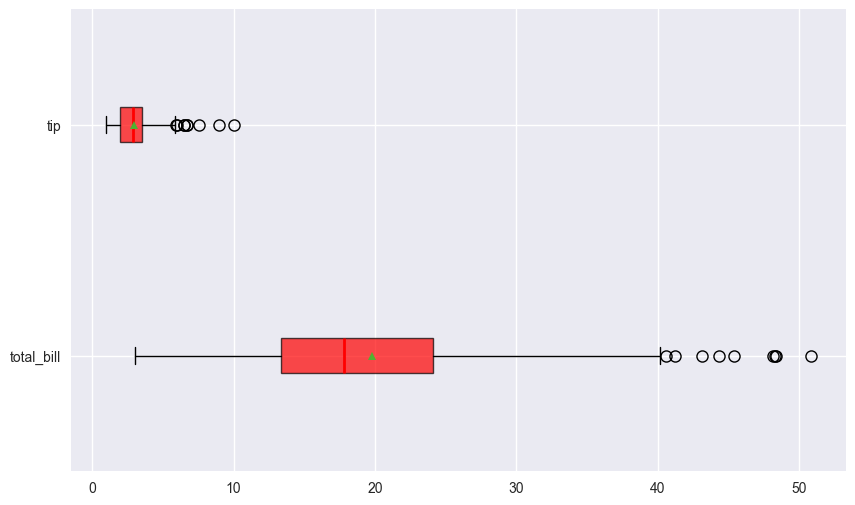

In [205]:

data = [df['total_bill'], df['tip']]


plt.figure(figsize=(10,6))

plt.boxplot(
    data, # dữ liệu để vẽ biểu đồ
    patch_artist = True, # tô màu cho hộp
    notch = False, #
    showmeans = True, # hiển thị độ trung bình
    labels = ['total_bill', 'tip'],  # nhãn 
    boxprops =dict(facecolor = 'red', alpha = 0.7),   # thuộc tính của hộp
    medianprops = dict(color = 'red', linewidth = 2), # thuộc tính của đường trtrung vị
    flierprops = dict(marker = 'o', markersize = 8),   # thuộc tính của điểm ngoại lai
    vert = False
)
plt.legend()
plt.show()

In [206]:
df2 = sns.load_dataset('iris')
df2

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


C:\Users\hungd\AppData\Local\Temp\ipykernel_6204\615258449.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(
C:\Users\hungd\AppData\Local\Temp\ipykernel_6204\615258449.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


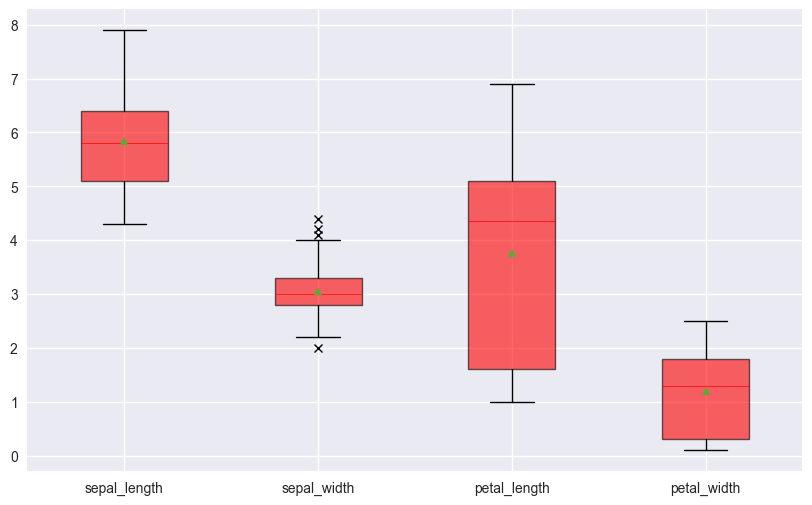

In [207]:
data = [df2['sepal_length'], df2['sepal_width'], df2['petal_length'], df2['petal_width']]


plt.figure(figsize=(10,6))
plt.boxplot(
    data,
    patch_artist = True,
    showmeans = True,
    boxprops = dict(facecolor ='red', alpha = 0.6),
    flierprops = dict(marker = 'x'),
    medianprops = dict(color = 'red', linewidth = 0.5),
    labels = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
)
plt.legend()
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x22f683afe10>,
 'caps': [<matplotlib.lines.Line2D at 0x22f683b50d0>,
 'boxes': [<matplotlib.patches.PathPatch at 0x22f683ad550>,
 'medians': [<matplotlib.lines.Line2D at 0x22f683b6490>,
 'fliers': [<matplotlib.lines.Line2D at 0x22f683b58d0>,
 'means': [<matplotlib.lines.Line2D at 0x22f683b6ed0>,
  <matplotlib.lines.Line2D at 0x22f683d3710>]}

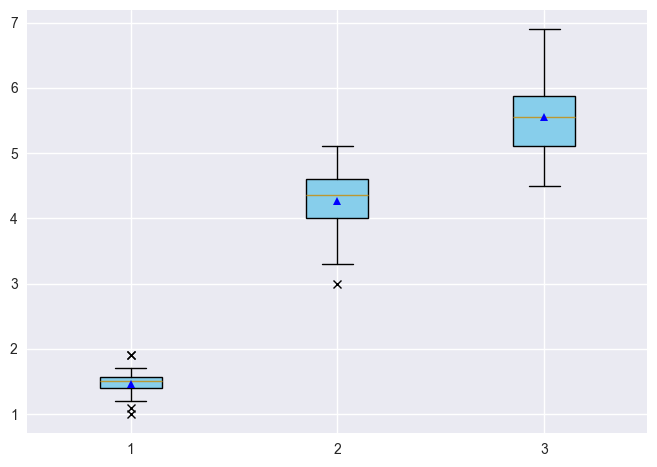

In [239]:
a = df2['species'].unique()
data_3 = []

for i in a:
    data_3.append(df2[df2['species'] == i]['petal_length'])


plt.boxplot(
    data_3,
    vert = True,
    patch_artist=True,
    showmeans = True,
    meanprops = dict(markerfacecolor = 'blue'),
    boxprops = dict(facecolor = 'skyblue'),
    flierprops = dict(marker = 'x'), 
    
)